In [4]:
import pandas as pd
import src.DataProcessing.read_data as rd

ruta = '../data/TABLAS ORDINARIOS CCTROLEBUS Vs11 20-10-2023-IMPR.xlsx'
hoja_c4_c6 = 'CONSOL C4-C6-L-V'
quitumbe_l_v = rd.tablas_ordinarios_c4_c6(ruta,hoja_c4_c6)
quitumbe_l_v.head()


,ORD,ACC.,COD. OP.,CIRCUITO,HORA SALIDA QUITUMBE,HORA LLEGADA MAYORISTA,HORA LLEGADA RECREO,HORA LLEGADA STO. DOMINGO,HORA LLEGADA COLÓN,HORA LLEGADA QUITUMBE,ARRIBO QUITUMBE,INTERVALO,TIEMPO EN ANDÉN,HORA SALIDA QUITUMBE MINUTOS,HORA LLEGADA QUITUMBE MINUTOS
0,1,>>,1Q,C4,05:00:00,05:18:54,05:28:04.800000,05:38:36.600000,05:54:00,06:48:00,NaN,NaN,NaN,300.0,408.0
1,2,>>,21Q,C6,05:06:00,05:12:30,05:23:15,05:28:07.500000,05:31:00,05:56:00,NaN,00:06:00,NaN,306.0,356.0
2,3,>>,2Q,C4,05:07:00,05:25:54,05:35:04.800000,05:45:36.600000,06:01:00,06:55:00,NaN,00:01:00,NaN,307.0,415.0
3,4,>>,3Q,C4,05:14:00,05:32:54,05:42:04.800000,05:52:36.600000,06:08:00,07:02:00,NaN,00:07:00,NaN,314.0,422.0
4,5,>>,22Q,C6,05:16:00,05:22:30,05:33:15,05:38:07.500000,05:41:00,06:06:00,NaN,00:02:00,NaN,316.0,366.0


In [5]:
arcos_costo = []

for i in quitumbe_l_v.iterrows():
    hora_llegada = i[1]['HORA LLEGADA QUITUMBE MINUTOS']
    a = quitumbe_l_v[quitumbe_l_v['HORA SALIDA QUITUMBE MINUTOS']>=hora_llegada]
    a = pd.DataFrame(a['HORA SALIDA QUITUMBE MINUTOS'] - hora_llegada).reset_index()
    a['Arco-Costo'] = a.apply(lambda row: (row['index']+1, row['HORA SALIDA QUITUMBE MINUTOS']), axis=1)
    arcos_costo.append(a['Arco-Costo'].tolist())
quitumbe_l_v['Arcos-Costo']=  pd.Series(arcos_costo)
quitumbe_l_v['Costo-Inicial'] = 0#quitumbe_l_v['HORA SALIDA QUITUMBE MINUTOS'] - 300
quitumbe_l_v.head()

,ORD,ACC.,COD. OP.,CIRCUITO,HORA SALIDA QUITUMBE,HORA LLEGADA MAYORISTA,HORA LLEGADA RECREO,HORA LLEGADA STO. DOMINGO,HORA LLEGADA COLÓN,HORA LLEGADA QUITUMBE,ARRIBO QUITUMBE,INTERVALO,TIEMPO EN ANDÉN,HORA SALIDA QUITUMBE MINUTOS,HORA LLEGADA QUITUMBE MINUTOS,Arcos-Costo,Costo-Inicial
0,1,>>,1Q,C4,05:00:00,05:18:54,05:28:04.800000,05:38:36.600000,05:54:00,06:48:00,NaN,NaN,NaN,300.0,408.0,"[(32.0, 5.0), (33.0, 8.0), (34.0, 13.0), (35.0...",0
1,2,>>,21Q,C6,05:06:00,05:12:30,05:23:15,05:28:07.500000,05:31:00,05:56:00,NaN,00:06:00,NaN,306.0,356.0,"[(16.0, 0.0), (17.0, 4.0), (18.0, 9.0), (19.0,...",0
2,3,>>,2Q,C4,05:07:00,05:25:54,05:35:04.800000,05:45:36.600000,06:01:00,06:55:00,NaN,00:01:00,NaN,307.0,415.0,"[(33.0, 1.0), (34.0, 6.0), (35.0, 11.0), (36.0...",0
3,4,>>,3Q,C4,05:14:00,05:32:54,05:42:04.800000,05:52:36.600000,06:08:00,07:02:00,NaN,00:07:00,NaN,314.0,422.0,"[(35.0, 4.0), (36.0, 9.0), (37.0, 14.0), (38.0...",0
4,5,>>,22Q,C6,05:16:00,05:22:30,05:33:15,05:38:07.500000,05:41:00,06:06:00,NaN,00:02:00,NaN,316.0,366.0,"[(19.0, 0.0), (20.0, 4.0), (21.0, 9.0), (22.0,...",0


In [6]:
N = quitumbe_l_v['ORD'].unique()
N

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
b = quitumbe_l_v['HORA LLEGADA QUITUMBE MINUTOS']
b = {key+1:value for key,value in b.to_dict().items()}
b

a = quitumbe_l_v['HORA SALIDA QUITUMBE MINUTOS']
a = {key+1:value for key,value in a.to_dict().items()}
a

{1: 300.0,
 2: 306.0,
 3: 307.0,
 4: 314.0,
 5: 316.0,
 6: 321.0,
 7: 326.0,
 8: 328.0,
 9: 335.0,
 10: 336.0,
 11: 340.0,
 12: 345.0,
 13: 346.0,
 14: 350.0,
 15: 355.0,
 16: 356.0,
 17: 360.0,
 18: 365.0,
 19: 366.0,
 20: 370.0,
 21: 375.0,
 22: 376.0,
 23: 380.0,
 24: 385.0,
 25: 386.0,
 26: 390.0,
 27: 395.0,
 28: 396.0,
 29: 400.0,
 30: 405.0,
 31: 406.0,
 32: 413.0,
 33: 416.0,
 34: 421.0,
 35: 426.0,
 36: 431.0,
 37: 436.0,
 38: 441.0,
 39: 451.0,
 40: 451.0,
 41: 461.0,
 42: 466.0,
 43: 471.0,
 44: 481.0,
 45: 481.0,
 46: 491.0,
 47: 496.0,
 48: 501.0,
 49: 508.0,
 50: 511.0,
 51: 515.0,
 52: 522.0,
 53: 526.0,
 54: 529.0,
 55: 536.0,
 56: 541.0,
 57: 543.0,
 58: 550.0,
 59: 556.0,
 60: 557.0,
 61: 564.0,
 62: 571.0,
 63: 571.0,
 64: 578.0,
 65: 581.0,
 66: 585.0,
 67: 591.0,
 68: 592.0,
 69: 599.0,
 70: 601.0,
 71: 606.0,
 72: 611.0,
 73: 613.0,
 74: 620.0,
 75: 621.0,
 76: 627.0,
 77: 631.0,
 78: 634.0,
 79: 641.0,
 80: 641.0,
 81: 648.0,
 82: 651.0,
 83: 655.0,
 84: 661.0,
 

In [8]:
costos = {}
for index,row in quitumbe_l_v.iterrows():
    costos_arcos = {(row['ORD'],int(i[0])):i[1] for i in row['Arcos-Costo']}
    costos_arcos[(0,row['ORD'])] = row['Costo-Inicial'] 
    costos_arcos[(row['ORD'],223)] = 0
    costos.update(costos_arcos)
print(costos)
arcos = costos.keys()
arcos_unidades = []
capacidad = 26
k = 1
for i in range(1,k+1):
    arcos_unidad_i = [(arco[0],arco[1],i) for arco in arcos]
    arcos_unidades += arcos_unidad_i
arcos_unidades

{(1, 32): np.float64(5.0), (1, 33): np.float64(8.0), (1, 34): np.float64(13.0), (1, 35): np.float64(18.0), (1, 36): np.float64(23.0), (1, 37): np.float64(28.0), (1, 38): np.float64(33.0), (1, 39): np.float64(43.0), (1, 40): np.float64(43.0), (1, 41): np.float64(53.0), (1, 42): np.float64(58.0), (1, 43): np.float64(63.0), (1, 44): np.float64(73.0), (1, 45): np.float64(73.0), (1, 46): np.float64(83.0), (1, 47): np.float64(88.0), (1, 48): np.float64(93.0), (1, 49): np.float64(100.0), (1, 50): np.float64(103.0), (1, 51): np.float64(107.0), (1, 52): np.float64(114.0), (1, 53): np.float64(118.0), (1, 54): np.float64(121.0), (1, 55): np.float64(128.0), (1, 56): np.float64(133.0), (1, 57): np.float64(135.0), (1, 58): np.float64(142.0), (1, 59): np.float64(148.0), (1, 60): np.float64(149.0), (1, 61): np.float64(156.0), (1, 62): np.float64(163.0), (1, 63): np.float64(163.0), (1, 64): np.float64(170.0), (1, 65): np.float64(173.0), (1, 66): np.float64(177.0), (1, 67): np.float64(183.0), (1, 68): n

[(1, 32, 1),
 (1, 33, 1),
 (1, 34, 1),
 (1, 35, 1),
 (1, 36, 1),
 (1, 37, 1),
 (1, 38, 1),
 (1, 39, 1),
 (1, 40, 1),
 (1, 41, 1),
 (1, 42, 1),
 (1, 43, 1),
 (1, 44, 1),
 (1, 45, 1),
 (1, 46, 1),
 (1, 47, 1),
 (1, 48, 1),
 (1, 49, 1),
 (1, 50, 1),
 (1, 51, 1),
 (1, 52, 1),
 (1, 53, 1),
 (1, 54, 1),
 (1, 55, 1),
 (1, 56, 1),
 (1, 57, 1),
 (1, 58, 1),
 (1, 59, 1),
 (1, 60, 1),
 (1, 61, 1),
 (1, 62, 1),
 (1, 63, 1),
 (1, 64, 1),
 (1, 65, 1),
 (1, 66, 1),
 (1, 67, 1),
 (1, 68, 1),
 (1, 69, 1),
 (1, 70, 1),
 (1, 71, 1),
 (1, 72, 1),
 (1, 73, 1),
 (1, 74, 1),
 (1, 75, 1),
 (1, 76, 1),
 (1, 77, 1),
 (1, 78, 1),
 (1, 79, 1),
 (1, 80, 1),
 (1, 81, 1),
 (1, 82, 1),
 (1, 83, 1),
 (1, 84, 1),
 (1, 85, 1),
 (1, 86, 1),
 (1, 87, 1),
 (1, 88, 1),
 (1, 89, 1),
 (1, 90, 1),
 (1, 91, 1),
 (1, 92, 1),
 (1, 93, 1),
 (1, 94, 1),
 (1, 95, 1),
 (1, 96, 1),
 (1, 97, 1),
 (1, 98, 1),
 (1, 99, 1),
 (1, 100, 1),
 (1, 101, 1),
 (1, 102, 1),
 (1, 103, 1),
 (1, 104, 1),
 (1, 105, 1),
 (1, 106, 1),
 (1, 107, 1),
 (1,

# ANTIGUO

In [11]:
import gurobipy as gp
from gurobipy import GRB

m1 = gp.Model('Asignacion-Flota-V1')
# Terminar al alcanzar un Gap del 20%
m1.Params.MIPGap = 0.10
m1.setParam('OutputFlag', 1)
# Enfocar estrategia en mejorar la cota dual
m1.Params.MIPFocus = 3

# Fijar generación muy agresiva de cortes
m1.Params.Cuts = 3

# Terminar luego de 180 segundos
m1.Params.TimeLimit = 1380

x = m1.addVars(arcos_unidades,vtype=GRB.BINARY,name='x')
# Update model to integrate new variables
m1.setParam('LogFile', 'gurobi.log')

m1.setObjective(gp.quicksum(costos[i,j]*x[i,j,k] for i,j,k in arcos_unidades),GRB.MINIMIZE)

m1.addConstrs((x.sum(n,'*','*') == 1 for n in N+[0]), name=f"Constraints")
for k in range(1,27):
    m1.addConstrs((x.sum('*',i,k)-x.sum(i,'*',k)==0 for i in N ),name=f'conservacion_{k}')

m1.addConstrs((x.sum(0,'*',k) <= 1 for k in range(1,27)), name=f"Constraints_2")
m1.write('Modelo.lp')


m1.optimize()

# Tiempo de ejecución 23m 57.0s approx 


Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-16
Set parameter MIPGap to value 0.1
Set parameter MIPFocus to value 3
Set parameter Cuts to value 3
Set parameter TimeLimit to value 1380
Set parameter LogFile to value "gurobi.log"
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 22.3.0 22D68)

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 6020 rows, 542646 columns and 1616394 nonzeros
Model fingerprint: 0x4de080b6
Variable types: 0 continuous, 542646 integer (542646 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 28 rows and 444 columns
Presolve time: 3.23s
Presolved: 5992 rows, 542202 columns, 1536752 nonzeros
Variable types: 0 continuous, 542202 integer (542202 binary)
Root relaxation presolve removed 35 rows a

# CAPACIDADES

In [41]:
import gurobipy as gp
from gurobipy import GRB

m1 = gp.Model('Asignacion-Flota-V1')
# Terminar al alcanzar un Gap del 20%
m1.Params.MIPGap = 0.10
m1.setParam('OutputFlag', 1)
# Enfocar estrategia en mejorar la cota dual
m1.Params.MIPFocus = 3

# Fijar generación muy agresiva de cortes
m1.Params.Cuts = 3

# Terminar luego de 180 segundos
m1.Params.TimeLimit = 1380

x = m1.addVars(arcos_unidades,vtype=GRB.BINARY,name='x')
# Update model to integrate new variables
m1.setParam('LogFile', 'gurobi.log')

m1.setObjective(gp.quicksum(costos[i,j]*x[i,j,k] for i,j,k in arcos_unidades),GRB.MINIMIZE)

m1.addConstrs((x.sum(n,'*','*') == 1 for n in N), name=f"Constraints")
for k in range(1,2):
    m1.addConstrs((x.sum('*',i,k)-x.sum(i,'*',k)==0 for i in N ),name=f'conservacion_{k}')

m1.addConstr(x.sum(0,'*',k) <= capacidad, name=f"Capacidades")
m1.write('Modelo.lp')


m1.optimize()


# Tiempo aproximado de solución 0.9s

Set parameter MIPGap to value 0.1
Set parameter MIPFocus to value 3
Set parameter Cuts to value 3
Set parameter TimeLimit to value 1380
Set parameter LogFile to value "gurobi.log"
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 22.3.0 22D68)

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 445 rows, 20901 columns and 62259 nonzeros
Model fingerprint: 0x2f1e507c
Variable types: 0 continuous, 20901 integer (20901 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 78 rows and 4512 columns
Presolve time: 0.37s
Presolved: 367 rows, 16389 columns, 32775 nonzeros
Variable types: 0 continuous, 16389 integer (16387 binary)
Root relaxation presolve removed 27 rows and 1764 columns
Root relaxation presolved: 340 rows, 14625 columns, 29247 nonzeros


Root relaxation: 

# BRECHAS DE TIEMPO

In [9]:
# Parametros

delta = 14
P = 30
break1 = 240
break2 = 720
break3 = 960
totalHorasTrabajadas =  1440

M_P = 5
M_T = 1440

In [10]:
# Creamos los arcos
import pandas as pd
arcos_costo = []

arcos_costo_A1 = []
arcos_costo_A2 = []

# Parametros para controlar tiempito minimo y máximo de espera
l1 = 0
u1 = 15

# Parámetros para controlar tiempo mínimo y máximo de descanso
delta = 10 # Parametro de tolerancia
P = 30 # Parametro que indica longitud de pause
l2 = P
u2 = P + delta 

for i in quitumbe_l_v.iterrows():
    hora_llegada = i[1]['HORA LLEGADA QUITUMBE MINUTOS']
    
    base_filtrada_A1 = quitumbe_l_v[
        (l1<=quitumbe_l_v['HORA SALIDA QUITUMBE MINUTOS']-hora_llegada) &
        (quitumbe_l_v['HORA SALIDA QUITUMBE MINUTOS']-hora_llegada<=u1)]
    base_filtrada_A1 = pd.DataFrame({'ORD':base_filtrada_A1['ORD'],'HORA SALIDA QUITUMBE MINUTOS':(base_filtrada_A1['HORA SALIDA QUITUMBE MINUTOS'] - hora_llegada)}).reset_index()
    base_filtrada_A1['Arco-Costo A1'] = base_filtrada_A1.apply(lambda row: (row['ORD'], row['HORA SALIDA QUITUMBE MINUTOS']), axis=1)
    arcos_costo_A1.append(base_filtrada_A1['Arco-Costo A1'].tolist())

    base_filtrada_A2 = quitumbe_l_v[
        (l2<=quitumbe_l_v['HORA SALIDA QUITUMBE MINUTOS']-hora_llegada) &
        (quitumbe_l_v['HORA SALIDA QUITUMBE MINUTOS']-hora_llegada<=u2)]
    base_filtrada_A2 = pd.DataFrame({'ORD':base_filtrada_A2['ORD'],'HORA SALIDA QUITUMBE MINUTOS':(base_filtrada_A2['HORA SALIDA QUITUMBE MINUTOS'] - hora_llegada)}).reset_index()
    base_filtrada_A2['Arco-Costo A2'] = base_filtrada_A2.apply(lambda row: (row['ORD'], row['HORA SALIDA QUITUMBE MINUTOS']), axis=1)
    arcos_costo_A2.append(base_filtrada_A2['Arco-Costo A2'].tolist())
    
quitumbe_l_v['Arcos-Costo A1']=  pd.Series(arcos_costo_A1)
quitumbe_l_v['Arcos-Costo A2']=  pd.Series(arcos_costo_A2)
quitumbe_l_v['Costo-Inicial'] = 0

quitumbe_l_v.head()

,ORD,ACC.,COD. OP.,CIRCUITO,HORA SALIDA QUITUMBE,HORA LLEGADA MAYORISTA,HORA LLEGADA RECREO,HORA LLEGADA STO. DOMINGO,HORA LLEGADA COLÓN,HORA LLEGADA QUITUMBE,ARRIBO QUITUMBE,INTERVALO,TIEMPO EN ANDÉN,HORA SALIDA QUITUMBE MINUTOS,HORA LLEGADA QUITUMBE MINUTOS,Arcos-Costo,Costo-Inicial,Arcos-Costo A1,Arcos-Costo A2
0,1,>>,1Q,C4,05:00:00,05:18:54,05:28:04.800000,05:38:36.600000,05:54:00,06:48:00,NaN,NaN,NaN,300.0,408.0,"[(32.0, 5.0), (33.0, 8.0), (34.0, 13.0), (35.0...",0,"[(32.0, 5.0), (33.0, 8.0), (34.0, 13.0)]","[(38.0, 33.0)]"
1,2,>>,21Q,C6,05:06:00,05:12:30,05:23:15,05:28:07.500000,05:31:00,05:56:00,NaN,00:06:00,NaN,306.0,356.0,"[(16.0, 0.0), (17.0, 4.0), (18.0, 9.0), (19.0,...",0,"[(16.0, 0.0), (17.0, 4.0), (18.0, 9.0), (19.0,...","[(25.0, 30.0), (26.0, 34.0), (27.0, 39.0), (28..."
2,3,>>,2Q,C4,05:07:00,05:25:54,05:35:04.800000,05:45:36.600000,06:01:00,06:55:00,NaN,00:01:00,NaN,307.0,415.0,"[(33.0, 1.0), (34.0, 6.0), (35.0, 11.0), (36.0...",0,"[(33.0, 1.0), (34.0, 6.0), (35.0, 11.0)]","[(39.0, 36.0), (40.0, 36.0)]"
3,4,>>,3Q,C4,05:14:00,05:32:54,05:42:04.800000,05:52:36.600000,06:08:00,07:02:00,NaN,00:07:00,NaN,314.0,422.0,"[(35.0, 4.0), (36.0, 9.0), (37.0, 14.0), (38.0...",0,"[(35.0, 4.0), (36.0, 9.0), (37.0, 14.0)]","[(41.0, 39.0)]"
4,5,>>,22Q,C6,05:16:00,05:22:30,05:33:15,05:38:07.500000,05:41:00,06:06:00,NaN,00:02:00,NaN,316.0,366.0,"[(19.0, 0.0), (20.0, 4.0), (21.0, 9.0), (22.0,...",0,"[(19.0, 0.0), (20.0, 4.0), (21.0, 9.0), (22.0,...","[(28.0, 30.0), (29.0, 34.0), (30.0, 39.0), (31..."


In [11]:
import numpy as np

# Unidades
M = len(quitumbe_l_v['COD. OP.'].unique()) 

# Viajes 
N = quitumbe_l_v['ORD'].unique()

# Creación del diccionario de costos
costos_A1 = {}
costos_A2 = {}
costos_inicio_fin = {}
for index,row in quitumbe_l_v.iterrows():
    costos_arcos_A1 = {(row['ORD'],int(i[0])):i[1] for i in row['Arcos-Costo A1']}
    costos_A1.update(costos_arcos_A1)
    
    costos_arcos_A2 = {(row['ORD'],int(i[0])):i[1] for i in row['Arcos-Costo A2']}
    costos_A2.update(costos_arcos_A2)
    
    costos_inicio_fin[(0,row['ORD'])] = row['Costo-Inicial'] 
    costos_inicio_fin[(row['ORD'],len(N)+1)] = 0
    
#costos = costos_A1.copy()
#costos.update(costos_A2)
#costos.update(costos_inicio_fin)

arcos_A1 = costos_A1.keys()
arcos_A2 = costos_A2.keys()
arcos_unidades_A1 = []
arcos_unidades_A2 = []
arcos_unidades_inicio_fin = []

arcos_unidad_i_A1 = [(arco[0],arco[1],1) for arco in arcos_A1 if arco[0]!=0 and arco[1]!=(len(N)+1)]
arcos_unidades_A1 += arcos_unidad_i_A1

arcos_unidad_i_A2 = [(arco[0],arco[1],1) for arco in arcos_A2 if arco[0]!=0 and arco[1]!=(len(N)+1)]
arcos_unidades_A2 += arcos_unidad_i_A2

arcos_unidades_inicio_fin += [(0,row['ORD'],1) for index,row in quitumbe_l_v.iterrows()]
arcos_unidades_inicio_fin += [(row['ORD'],len(N)+1,1) for index,row in quitumbe_l_v.iterrows()]
    
print(len(arcos_unidades_A1))
print(len(arcos_unidades_A2))
print(len(arcos_unidades_inicio_fin))
arcos = arcos_unidades_A1+arcos_unidades_A2+arcos_unidades_inicio_fin

indices_A1 = list(set([elemento for tupla in arcos_unidades_A1 for elemento in tupla]))

print(len(indices_A1))

indices_A2 = list(set([elemento for tupla in arcos_unidades_A2 for elemento in tupla]))
print(len(indices_A2))

695
477
444
222
222


## SOLUCION SOLO CON LOS ARCOS YA RESTRINGUIDOS

In [79]:
import gurobipy as gp
from gurobipy import GRB

m1 = gp.Model('Asignacion-Flota-V1')
# Terminar al alcanzar un Gap del 20%
m1.Params.MIPGap = 0.10
m1.setParam('OutputFlag', 1)
# Enfocar estrategia en mejorar la cota dual
m1.Params.MIPFocus = 3

# Fijar generación muy agresiva de cortes
m1.Params.Cuts = 3

# Terminar luego de 180 segundos
m1.Params.TimeLimit = 1380

x = m1.addVars(arcos,vtype=GRB.BINARY,name='x')
z = m1.addVars(N,vtype=GRB.BINARY,name='z')

T = m1.addVars(N,vtype=GRB.INTEGER,name='T')

m1.setParam('LogFile', 'gurobi.log')

m1.setObjective(gp.quicksum(costos[i,j]*x[i,j,k] for i,j,k in arcos)+ 1000*z.sum('*') ,GRB.MINIMIZE)

m1.addConstrs((x.sum(n,'*','*') == 1 - z[n] for n in N), name=f"Constraints")
m1.addConstrs((x.sum('*',i,1)-x.sum(i,'*',1)==0 for i in N ),name=f'Conservacion')
m1.addConstr(x.sum(0,'*',1) <= capacidad, name=f"Capacidades")

m1.write('Modelo.lp')


m1.optimize()

Set parameter MIPGap to value 0.1
Set parameter MIPFocus to value 3
Set parameter Cuts to value 3
Set parameter TimeLimit to value 1380
Set parameter LogFile to value "gurobi.log"
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 22.3.0 22D68)

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 445 rows, 2060 columns and 4626 nonzeros
Model fingerprint: 0x44f12d9b
Variable types: 0 continuous, 2060 integer (1838 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Found heuristic solution: objective 222000.00000
Presolve removed 22 rows and 463 columns
Presolve time: 0.00s
Presolved: 423 rows, 1597 columns, 4277 nonzeros
Variable types: 0 continuous, 1597 integer (1597 binary)
Found heuristic solution: objective 170127.00000
Root relaxation presolved: 423 rows, 1597 columns, 4277

## IMPLEMENTANDO LAS NUEVAS RESTRICCIONES

In [46]:
import gurobipy as gp
from gurobipy import GRB

m3 = gp.Model('Asignacion-Flota-V1')
# Terminar al alcanzar un Gap del 20%
m3.Params.MIPGap = 0.10
m3.setParam('OutputFlag', 1)
# Enfocar estrategia en mejorar la cota dual
m3.Params.MIPFocus = 2
m3.Params.NoRelHeurTime = 300

# Fijar generación muy agresiva de cortes
m3.Params.Cuts = 2

# Terminar luego de 180 segundos
m3.Params.TimeLimit = 23800

x = m3.addVars(arcos,vtype=GRB.BINARY,name='x')
z = m3.addVars(N,vtype=GRB.BINARY,name='z')

T = m3.addVars(N,vtype=GRB.INTEGER,name='T',ub=1440)
PV = m3.addVars(N,vtype=GRB.INTEGER,name='P',lb=0,ub=2)

y0 = m3.addVars(N,vtype=GRB.BINARY,name='y1')
y1 = m3.addVars(N,vtype=GRB.BINARY,name='y2')
y2 = m3.addVars(N,vtype=GRB.BINARY,name='y3')


m3.setParam('LogFile', 'gurobi.log')

m3.setObjective(gp.quicksum(costos[i,j]*x[i,j,k] for i,j,k in arcos)+ 1000*z.sum('*') ,GRB.MINIMIZE)

m3.addConstrs((x.sum(n,'*','*') == 1 - z[n] for n in N), name=f"Constraints")
m3.addConstrs((x.sum('*',i,1)-x.sum(i,'*',1)==0 for i in N ),name=f'Conservacion')
m3.addConstr(x.sum(0,'*',1) <= capacidad, name=f"Capacidades")


m3.addConstrs((T[j] >= T[i] + (b[j]-b[i]) - M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='T_upper_A1')
m3.addConstrs((T[j] <= T[i] + (b[j]-b[i]) + M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='T_lower_A1')

m3.addConstrs((PV[j] >= PV[i] - M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='P_upper_A1')
m3.addConstrs((PV[j] <= PV[i] + M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='P_lower_A1')

m3.addConstrs((T[j] >= T[i] + (b[j]-b[i]) - M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='T_upper_A2')
m3.addConstrs((T[j] <= T[i] + (b[j]-b[i]) + M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='T_lower_A2')

m3.addConstrs((PV[j] >= PV[i] - M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='P_upper_A2')
m3.addConstrs((PV[j] <= PV[i] + M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='P_lower_A2')

m3.addConstrs((T[i]<= 240 - 0.5*P + delta+M_T*(1-y0[i]) for i in N), name = 'N1_Restriccion' ) # A partir de aquí ya no se optimiza enseguida el código pero se optiene soluciones factibles
m3.addConstrs((T[i]>= 240 + 0.5*P - delta-M_T*(1-y1[i]) for i in N), name = 'N2_Restriccion' )
m3.addConstrs((T[i]<= 720 - 0.5*P + delta+M_T*(1-y1[i]) for i in N), name = 'N3_Restriccion' )
m3.addConstrs((T[i]>= 720 + 0.5*P - delta-M_T*(1-y2[i]) for i in N), name = 'N4_Restriccion' )
m3.addConstrs((T[i]<= 960 + M_T*(1-y2[i]) for i in N), name = 'N4_Restriccion' )

m3.addConstrs((y0[n]+y1[n]+y2[n]==1 for n in N ),name='Aux1')
m3.addConstrs((y1[n]+2*y2[n]==PV[n] for n in N ),name='Aux2')

m3.write('Modelo.lp')


m3.optimize()

# 340m  15.7s

Set parameter MIPGap to value 0.1
Set parameter MIPFocus to value 2
Set parameter NoRelHeurTime to value 300
Set parameter Cuts to value 2
Set parameter TimeLimit to value 23800
Set parameter LogFile to value "gurobi.log"
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 22.3.0 22D68)

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 6687 rows, 2948 columns and 22242 nonzeros
Model fingerprint: 0x21a10ab4
Variable types: 0 continuous, 2948 integer (2504 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+03]
  RHS range        [1e+00, 2e+03]
Found heuristic solution: objective 222000.00000
Presolve removed 688 rows and 241 columns
Presolve time: 0.04s
Presolved: 5999 rows, 2707 columns, 21005 nonzeros
Variable types: 0 continuous, 2707 integer (2263 binary)
Found heuristic solution: objective 192007.00000
Starting

In [13]:
def generar_sublistas(tuplas):
    sublistas = []
    while tuplas:
        sublista = []
        actual = tuplas.pop(0)
        sublista.append(actual)
        
        # Buscar conexiones hacia adelante
        while True:
            found = False
            for i, t in enumerate(tuplas):
                if t[0] == actual[1]:
                    sublista.append(t)
                    actual = t
                    tuplas.pop(i)
                    found = True
                    break
            if not found:
                break
        
        sublistas.append(sublista)
    
    return sublistas

# Tu lista de tuplas
tuplas = [(1,12,1),(2,10,1),(12,15,1),(3,16,1),(10,11,1),(15,21,1)]
resultado = generar_sublistas(tuplas)
print(resultado)


[[(1, 12, 1), (12, 15, 1), (15, 21, 1)], [(2, 10, 1), (10, 11, 1)], [(3, 16, 1)]]


In [42]:
vx = m1.getAttr('x', x)
solucion = {}
tuplas = []
contador = 1
for tupla,valor in vx.items():
    if valor >= 0.95 :
        tuplas.append(tupla)

resultado = generar_sublistas(tuplas)
print(resultado)

contador = 1
solucion = {} 
for i in resultado:
    if len(i)>1:
        solucion[contador] = {0:0}
        
        solucion[contador][0]= i[0][0]
        for k in i:
            solucion[contador][k[0]]= k[1]
        contador +=1
        
solucion
        



[[(1, 32, 1), (32, 66, 1), (66, 94, 1), (94, 110, 1), (110, 140, 1), (140, 170, 1), (170, 197, 1), (197, 223, 1)], [(0, 1, 1)], [(2, 16, 1), (16, 31, 1), (31, 41, 1), (41, 69, 1), (69, 98, 1), (98, 129, 1), (129, 150, 1), (150, 177, 1), (177, 201, 1), (201, 209, 1), (209, 217, 1), (217, 223, 1)], [(0, 2, 1)], [(3, 33, 1), (33, 43, 1), (43, 67, 1), (67, 82, 1), (82, 102, 1), (102, 132, 1), (132, 155, 1), (155, 188, 1), (188, 223, 1)], [(0, 3, 1)], [(4, 35, 1), (35, 44, 1), (44, 71, 1), (71, 105, 1), (105, 135, 1), (135, 146, 1), (146, 171, 1), (171, 187, 1), (187, 206, 1), (206, 214, 1), (214, 221, 1), (221, 223, 1)], [(0, 4, 1)], [(5, 19, 1), (19, 34, 1), (34, 65, 1), (65, 78, 1), (78, 108, 1), (108, 122, 1), (122, 148, 1), (148, 161, 1), (161, 191, 1), (191, 223, 1)], [(0, 5, 1)], [(6, 36, 1), (36, 64, 1), (64, 95, 1), (95, 126, 1), (126, 154, 1), (154, 167, 1), (167, 195, 1), (195, 203, 1), (203, 211, 1), (211, 219, 1), (219, 223, 1)], [(0, 6, 1)], [(7, 22, 1), (22, 55, 1), (55, 83, 

{1: {0: 1,
  1: 32,
  32: 66,
  66: 94,
  94: 110,
  110: 140,
  140: 170,
  170: 197,
  197: 223},
 2: {0: 2,
  2: 16,
  16: 31,
  31: 41,
  41: 69,
  69: 98,
  98: 129,
  129: 150,
  150: 177,
  177: 201,
  201: 209,
  209: 217,
  217: 223},
 3: {0: 3,
  3: 33,
  33: 43,
  43: 67,
  67: 82,
  82: 102,
  102: 132,
  132: 155,
  155: 188,
  188: 223},
 4: {0: 4,
  4: 35,
  35: 44,
  44: 71,
  71: 105,
  105: 135,
  135: 146,
  146: 171,
  171: 187,
  187: 206,
  206: 214,
  214: 221,
  221: 223},
 5: {0: 5,
  5: 19,
  19: 34,
  34: 65,
  65: 78,
  78: 108,
  108: 122,
  122: 148,
  148: 161,
  161: 191,
  191: 223},
 6: {0: 6,
  6: 36,
  36: 64,
  64: 95,
  95: 126,
  126: 154,
  154: 167,
  167: 195,
  195: 203,
  203: 211,
  211: 219,
  219: 223},
 7: {0: 7,
  7: 22,
  22: 55,
  55: 83,
  83: 114,
  114: 141,
  141: 165,
  165: 194,
  194: 223},
 8: {0: 8, 8: 37, 37: 62, 62: 99, 99: 130, 130: 158, 158: 186, 186: 223},
 9: {0: 9, 9: 68, 68: 96, 96: 128, 128: 152, 152: 179, 179: 223},


In [43]:
asignacion = pd.DataFrame()
for k in range(1,27):    
    nodo = 0    
    ord = []
    tiempo_anden = []
    while nodo != 223:
        tiempo_anden.append(costos[nodo,solucion[k][nodo]])
        ord.append(solucion[k][nodo])
        nodo = solucion[k][nodo]
    
    a = quitumbe_l_v[list(quitumbe_l_v.columns[0:1]) + list(quitumbe_l_v.columns[3:5]) + list(quitumbe_l_v.columns[9:10])]
    a = a[a['ORD'].isin(ord)].reset_index(drop=True)
    a['Tiempo en anden'] = pd.Series(tiempo_anden)
    a['UNIDAD ASIGNADA'] = k
    
    asignacion = pd.concat([asignacion,a])
asignacion = asignacion.sort_values(by='HORA SALIDA QUITUMBE')
asignacion

,ORD,CIRCUITO,HORA SALIDA QUITUMBE,HORA LLEGADA QUITUMBE,Tiempo en anden,UNIDAD ASIGNADA
0,1,C4,05:00:00,06:48:00,0.0,1
0,2,C6,05:06:00,05:56:00,0.0,2
0,3,C4,05:07:00,06:55:00,0.0,3
0,4,C4,05:14:00,07:02:00,0.0,4
0,5,C6,05:16:00,06:06:00,0.0,5
...,...,...,...,...,...,...
11,218,C6,21:34:00,22:24:00,6.0,11
10,219,C6,21:41:00,22:31:00,6.0,6
9,220,C6,21:49:00,22:39:00,0.0,18
11,221,C6,21:57:00,22:47:00,1.0,4


In [44]:


import pandas as pd

def hora_a_minutos(n):
    hora = str(n).split(':')
    if len(hora) == 3:
        return float(hora[0])*60 + float(hora[1])+ float(hora[2])/100
    if len(hora) == 2:
        return float(hora[0])*60 + float(hora[1])
asignacion[asignacion['UNIDAD ASIGNADA']==1]

,ORD,CIRCUITO,HORA SALIDA QUITUMBE,HORA LLEGADA QUITUMBE,Tiempo en anden,UNIDAD ASIGNADA
0,1,C4,05:00:00,06:48:00,0.0,1
1,32,C4,06:53:00,08:48:00,5.0,1
2,66,C4,09:45:00,11:40:00,57.0,1
3,94,C6,11:41:00,12:33:00,1.0,1
4,110,C4,12:41:00,14:36:00,8.0,1
5,140,C6,14:41:00,15:33:00,5.0,1
6,170,C4,17:11:00,19:06:00,98.0,1
7,197,C6,19:07:00,19:59:00,1.0,1


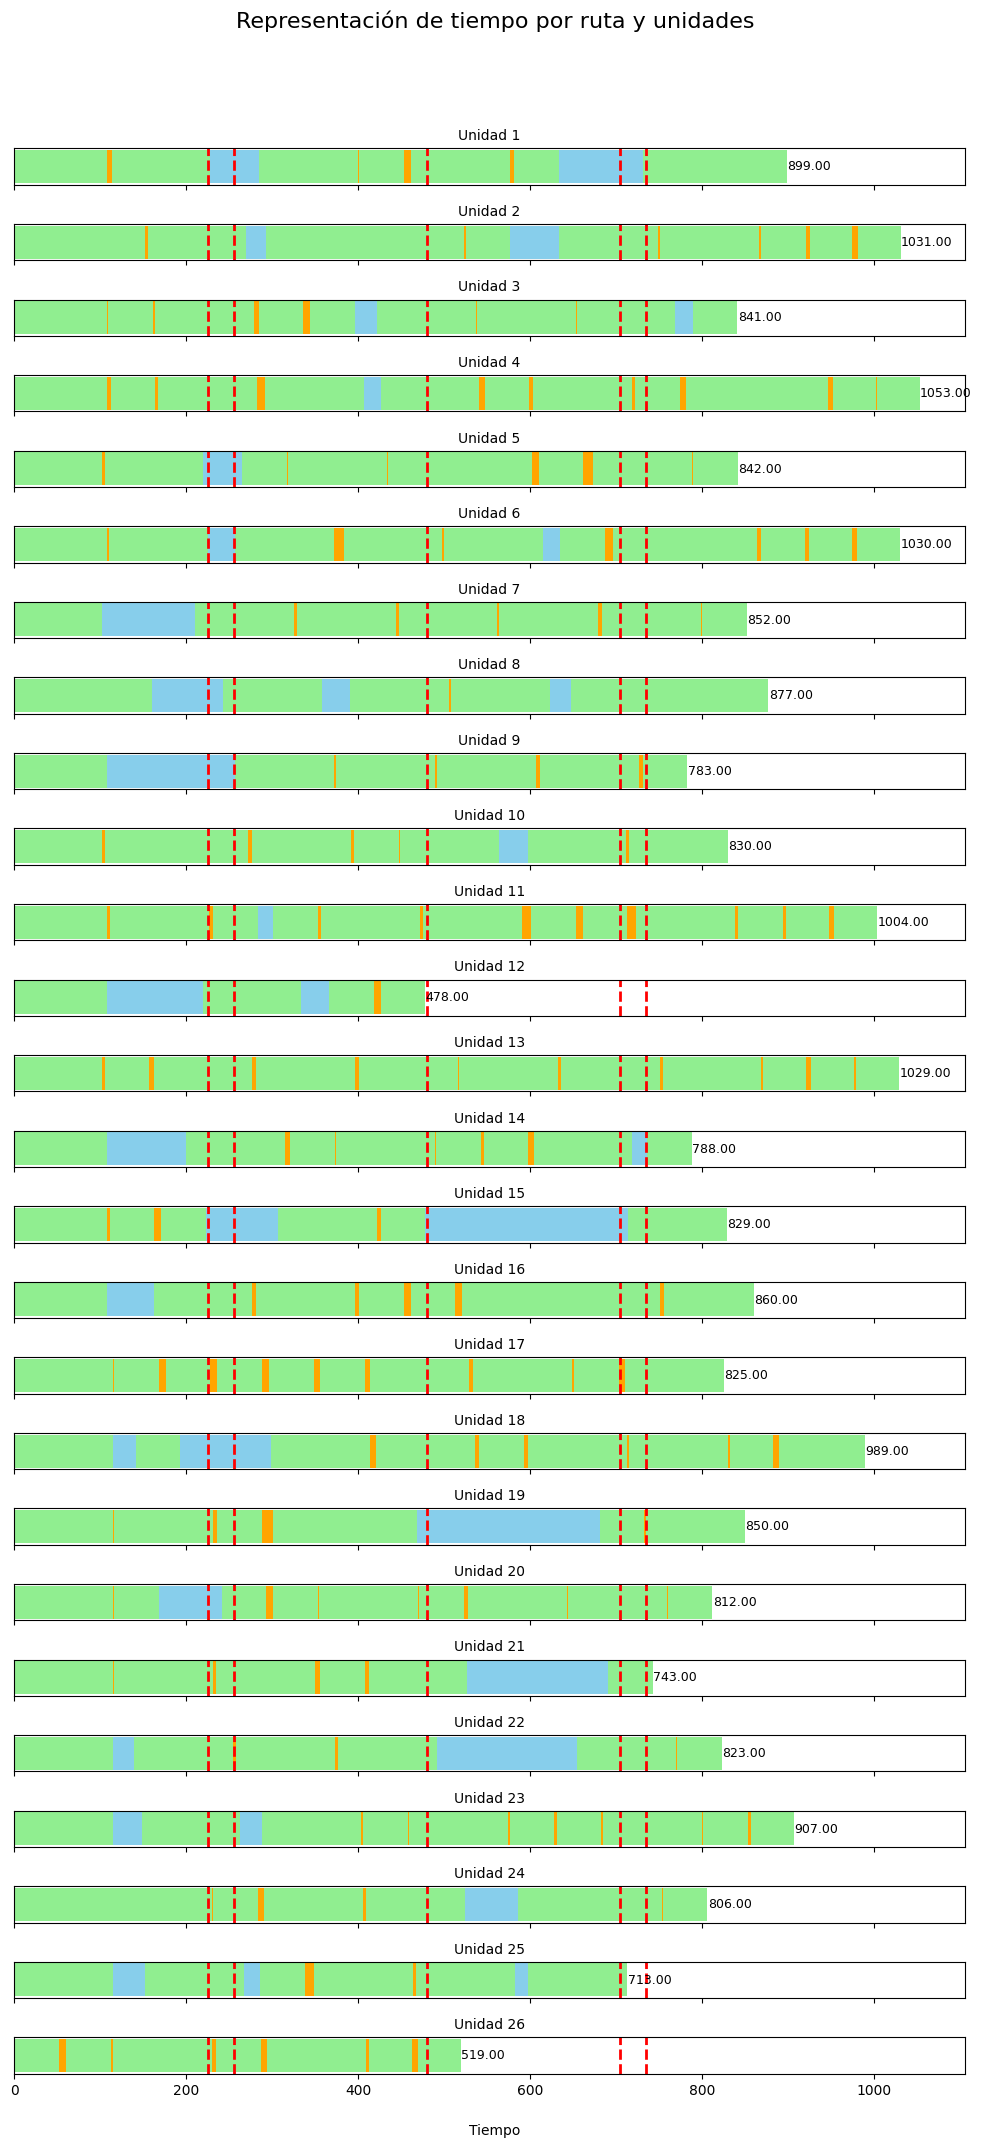

In [45]:
import matplotlib.pyplot as plt

asignacion['TIEMPO_VIAJE'] = asignacion['HORA LLEGADA QUITUMBE'].apply(hora_a_minutos) - asignacion['HORA SALIDA QUITUMBE'].apply(hora_a_minutos)

# Valor umbral para cambiar de color
valor_umbral = 15

# Obtener las unidades únicas
unidades = asignacion['UNIDAD ASIGNADA'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales
lineas_verticales = [225, 255, 480, 705, 735]

for i, unidad in enumerate(unidades):
    asignacion_unidad = asignacion[asignacion['UNIDAD ASIGNADA'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in asignacion_unidad.iterrows():
        if not np.isnan(row['Tiempo en anden']):
            Type.append('A1')
            Time.append(row['Tiempo en anden'])
            # Asignar color según el valor del tiempo en andén
            if row['Tiempo en anden'] < valor_umbral:
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Representación de tiempo por ruta y unidades', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

[[(2, 16, 1), (16, 31, 1), (31, 41, 1), (41, 65, 1), (65, 80, 1), (80, 93, 1), (93, 223, 1)], [(3, 33, 1), (33, 43, 1), (43, 68, 1), (68, 97, 1), (97, 112, 1), (112, 223, 1)], [(4, 35, 1), (35, 44, 1), (44, 69, 1), (69, 98, 1), (98, 129, 1), (129, 223, 1)], [(5, 19, 1), (19, 34, 1), (34, 56, 1), (56, 70, 1), (70, 83, 1), (83, 113, 1), (113, 223, 1)], [(7, 22, 1), (22, 37, 1), (37, 47, 1), (47, 58, 1), (58, 86, 1), (86, 223, 1)], [(10, 25, 1), (25, 38, 1), (38, 59, 1), (59, 72, 1), (72, 87, 1), (87, 101, 1), (101, 223, 1)], [(11, 39, 1), (39, 63, 1), (63, 77, 1), (77, 92, 1), (92, 108, 1), (108, 122, 1), (122, 223, 1)], [(13, 28, 1), (28, 40, 1), (40, 50, 1), (50, 61, 1), (61, 90, 1), (90, 124, 1), (124, 223, 1)], [(15, 42, 1), (42, 52, 1), (52, 79, 1), (79, 111, 1), (111, 125, 1), (125, 223, 1)], [(18, 45, 1), (45, 57, 1), (57, 84, 1), (84, 99, 1), (99, 131, 1), (131, 142, 1), (142, 223, 1)], [(24, 48, 1), (48, 75, 1), (75, 89, 1), (89, 105, 1), (105, 135, 1), (135, 223, 1)], [(46, 71,

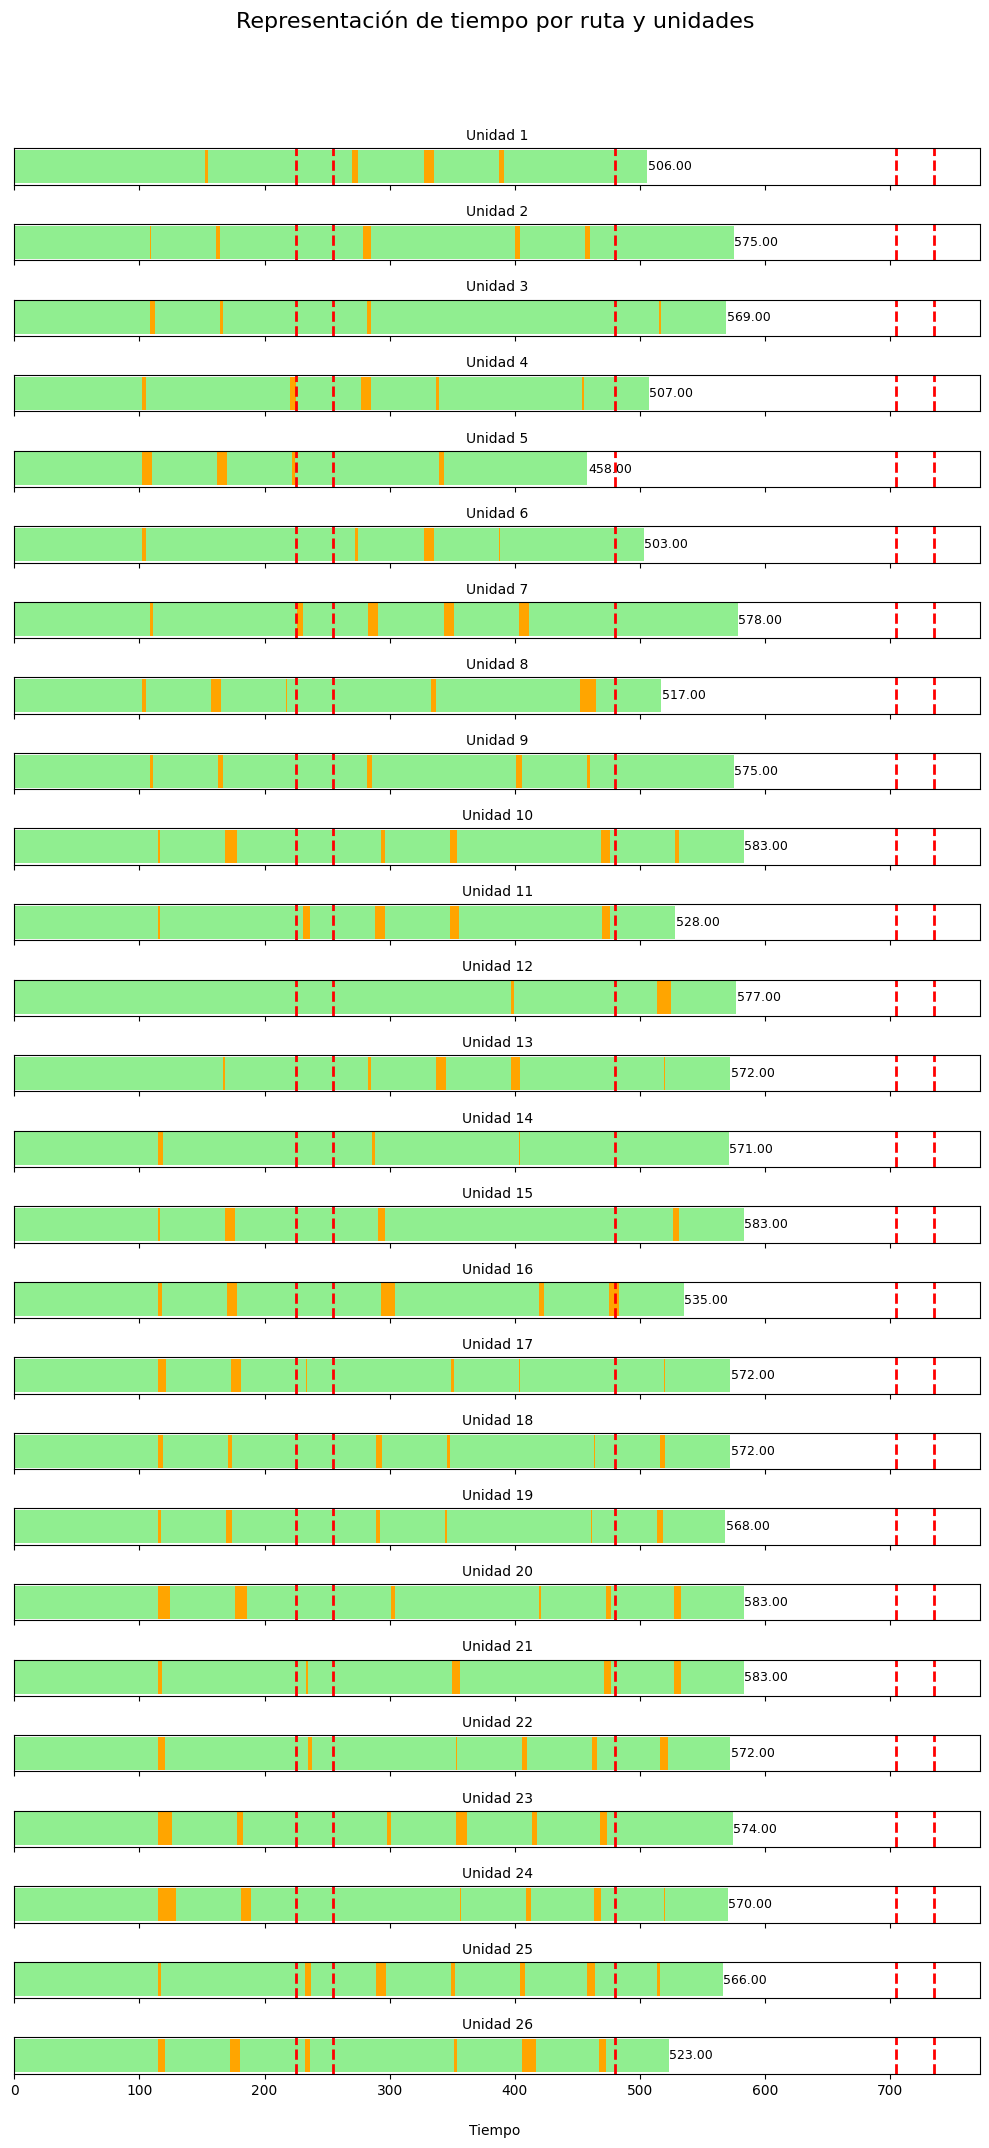

In [48]:
vx = m3.getAttr('x', x)
solucion = {}
tuplas = []
contador = 1
for tupla,valor in vx.items():
    if valor >= 0.95 :
        tuplas.append(tupla)

resultado = generar_sublistas(tuplas)
print(resultado)

contador = 1
solucion = {} 
for i in resultado:
    if len(i)>1:
        solucion[contador] = {0:0}
        
        solucion[contador][0]= i[0][0]
        for k in i:
            solucion[contador][k[0]]= k[1]
        contador +=1
        
solucion
        

asignacion = pd.DataFrame()
for k in range(1,27):    
    nodo = 0    
    ord = []
    tiempo_anden = []
    while nodo != 223:
        tiempo_anden.append(costos[nodo,solucion[k][nodo]])
        ord.append(solucion[k][nodo])
        nodo = solucion[k][nodo]
    
    a = quitumbe_l_v[list(quitumbe_l_v.columns[0:1]) + list(quitumbe_l_v.columns[3:5]) + list(quitumbe_l_v.columns[9:10])]
    a = a[a['ORD'].isin(ord)].reset_index(drop=True)
    a['Tiempo en anden'] = pd.Series(tiempo_anden)
    a['UNIDAD ASIGNADA'] = k
    
    asignacion = pd.concat([asignacion,a])
asignacion = asignacion.sort_values(by='HORA SALIDA QUITUMBE')
asignacion

import matplotlib.pyplot as plt

asignacion['TIEMPO_VIAJE'] = asignacion['HORA LLEGADA QUITUMBE'].apply(hora_a_minutos) - asignacion['HORA SALIDA QUITUMBE'].apply(hora_a_minutos)

# Valor umbral para cambiar de color
valor_umbral = 15

# Obtener las unidades únicas
unidades = asignacion['UNIDAD ASIGNADA'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales
lineas_verticales = [225, 255, 480, 705, 735]

for i, unidad in enumerate(unidades):
    asignacion_unidad = asignacion[asignacion['UNIDAD ASIGNADA'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in asignacion_unidad.iterrows():
        if not np.isnan(row['Tiempo en anden']):
            Type.append('A1')
            Time.append(row['Tiempo en anden'])
            # Asignar color según el valor del tiempo en andén
            if row['Tiempo en anden'] < valor_umbral:
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Representación de tiempo por ruta y unidades', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()